In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv("datasets/churn/train_.csv")
test_data = pd.read_csv("datasets/churn/test_.csv")

In [4]:
train_data.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4531,19,61.55,1093.2,Male,0,No,No,Yes,No,DSL,No,No,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),0
4107,4,19.90,76.65,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1063,5,70.05,346.4,Male,0,No,No,Yes,No,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
3321,23,96.90,2085.45,Male,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),0
344,33,60.90,2033.85,Female,0,No,No,Yes,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0
797,29,51.60,1442,Male,1,Yes,No,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
4233,67,84.80,5598.3,Female,0,Yes,Yes,Yes,No,Fiber optic,Yes,Yes,Yes,No,No,No,One year,No,Bank transfer (automatic),0
36,46,19.20,908.15,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
1752,4,84.60,360.1,Female,1,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,1
4060,31,49.20,1498.55,Female,0,Yes,No,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,0


In [5]:
num_cols = ['ClientPeriod', 'MonthlySpending', 'TotalSpent']
cat_cols = ['Sex', 'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService',
           'HasMultiplePhoneNumbers', 'HasInternetService', 'HasOnlineSecurityService',
           'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV',
           'HasMovieSubscription', 'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod']
feature_cols = num_cols + cat_cols
target = 'Churn'

In [6]:
train_data.info() # Нету значений null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [7]:
train_data['TotalSpent'].value_counts()

           9
20.2       9
19.75      8
20.05      6
19.65      6
          ..
41.85      1
4326.25    1
950.2      1
4264       1
1375.6     1
Name: TotalSpent, Length: 4978, dtype: int64

In [8]:
train_data.query('TotalSpent == " "')

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [9]:
#train_data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors = 'coerce')

In [10]:
train_data["TotalSpent"].replace(' ', '0', inplace = True) #Однако есть пропуски в колонке "TotalSpent"

In [11]:
for col in cat_cols:
    print(train_data[col].value_counts())
    print('-'*60)

Male      2655
Female    2627
Name: Sex, dtype: int64
------------------------------------------------------------
0    4440
1     842
Name: IsSeniorCitizen, dtype: int64
------------------------------------------------------------
No     2705
Yes    2577
Name: HasPartner, dtype: int64
------------------------------------------------------------
No     3676
Yes    1606
Name: HasChild, dtype: int64
------------------------------------------------------------
Yes    4761
No      521
Name: HasPhoneService, dtype: int64
------------------------------------------------------------
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64
------------------------------------------------------------
Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64
------------------------------------------------------------
No                     2612
Yes                    1529
No internet service  

In [12]:
train_data['TotalSpent'] = train_data['TotalSpent'].apply(lambda x: float(x)) #"TotalSpent" ошибочно распознаётся как категориальный признак
train_data['IsSeniorCitizen'] = train_data['IsSeniorCitizen'].apply(lambda x: str(x)) #"IsSeniorCitizen" ошибочно распознаётся как числовой признак

In [13]:
for column in feature_cols:
    print(column, ': ')
    print(train_data[column].isna().value_counts()) # Видим, что ни в одном столбце нету значений null

ClientPeriod : 
False    5282
Name: ClientPeriod, dtype: int64
MonthlySpending : 
False    5282
Name: MonthlySpending, dtype: int64
TotalSpent : 
False    5282
Name: TotalSpent, dtype: int64
Sex : 
False    5282
Name: Sex, dtype: int64
IsSeniorCitizen : 
False    5282
Name: IsSeniorCitizen, dtype: int64
HasPartner : 
False    5282
Name: HasPartner, dtype: int64
HasChild : 
False    5282
Name: HasChild, dtype: int64
HasPhoneService : 
False    5282
Name: HasPhoneService, dtype: int64
HasMultiplePhoneNumbers : 
False    5282
Name: HasMultiplePhoneNumbers, dtype: int64
HasInternetService : 
False    5282
Name: HasInternetService, dtype: int64
HasOnlineSecurityService : 
False    5282
Name: HasOnlineSecurityService, dtype: int64
HasOnlineBackup : 
False    5282
Name: HasOnlineBackup, dtype: int64
HasDeviceProtection : 
False    5282
Name: HasDeviceProtection, dtype: int64
HasTechSupportAccess : 
False    5282
Name: HasTechSupportAccess, dtype: int64
HasOnlineTV : 
False    5282
Name: HasOn

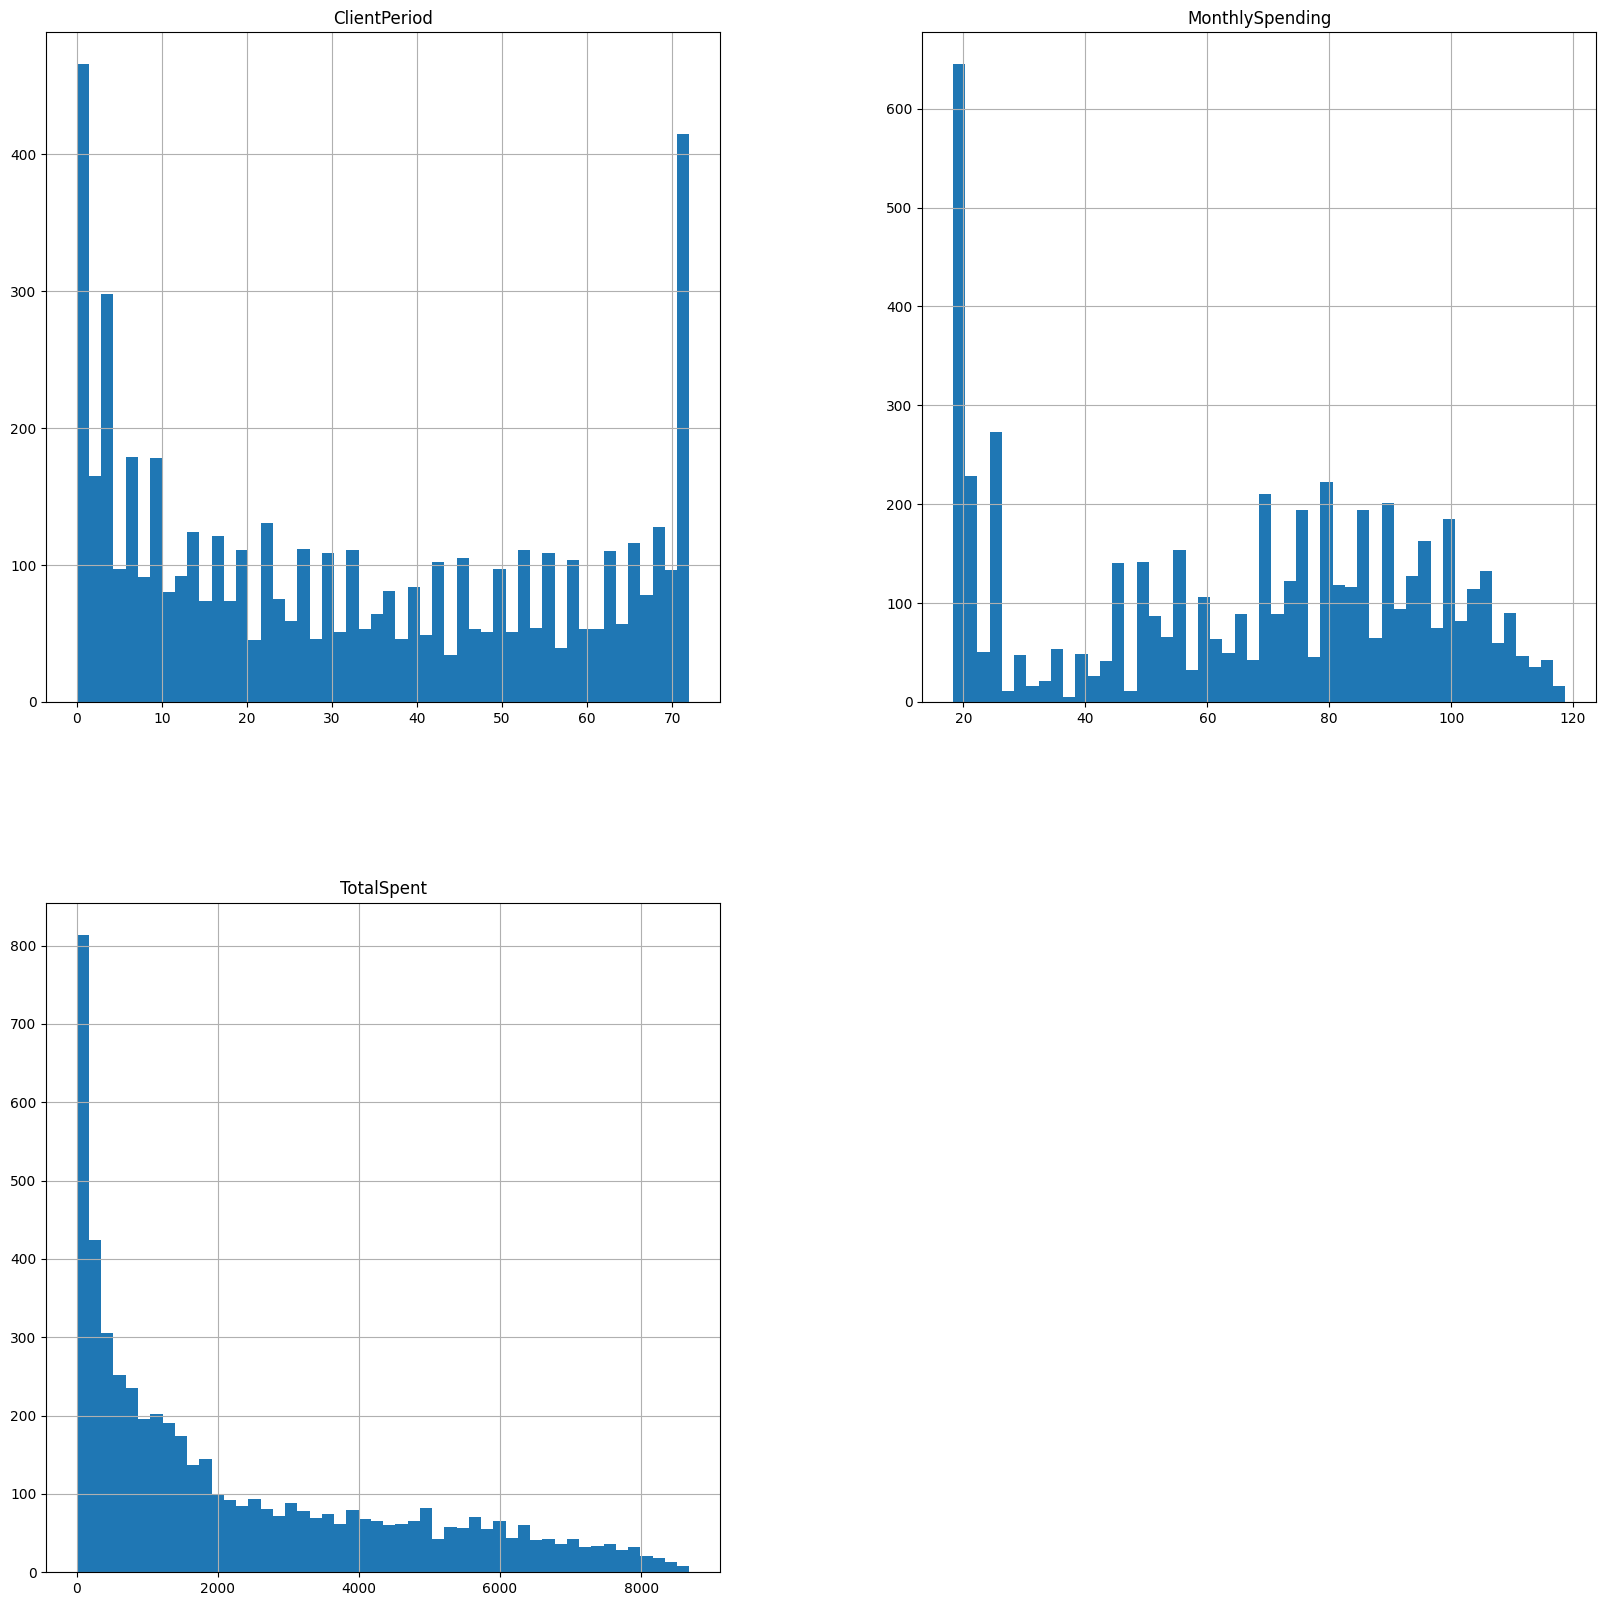

In [14]:
train_data[num_cols].hist(bins = 50, figsize = (20, 20)); # Гистограммы для числовых признаков

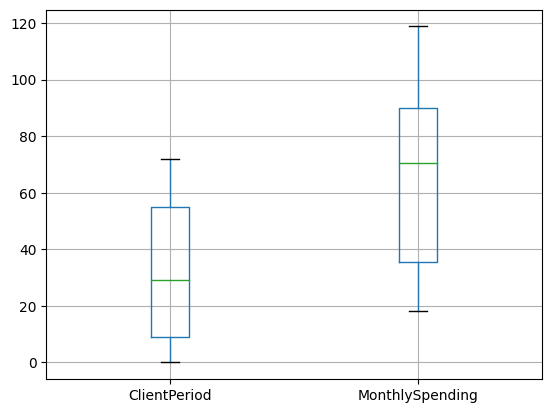

In [15]:
train_data[['ClientPeriod', 'MonthlySpending']].boxplot(); # Boxplot для них же

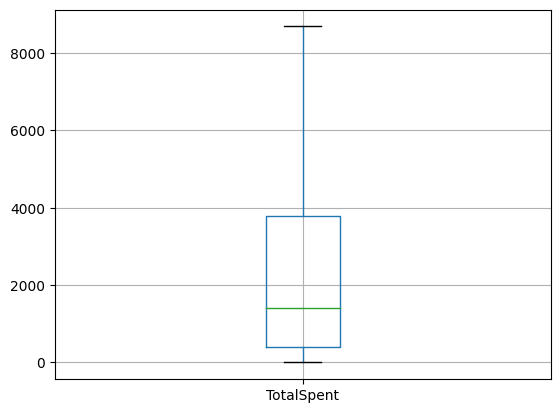

In [16]:
train_data[['TotalSpent']].boxplot();

In [17]:
for col in cat_cols:
    print(col, ': ',)
    print(train_data[col].value_counts());

Sex : 
Male      2655
Female    2627
Name: Sex, dtype: int64
IsSeniorCitizen : 
0    4440
1     842
Name: IsSeniorCitizen, dtype: int64
HasPartner : 
No     2705
Yes    2577
Name: HasPartner, dtype: int64
HasChild : 
No     3676
Yes    1606
Name: HasChild, dtype: int64
HasPhoneService : 
Yes    4761
No      521
Name: HasPhoneService, dtype: int64
HasMultiplePhoneNumbers : 
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64
HasInternetService : 
Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64
HasOnlineSecurityService : 
No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64
HasOnlineBackup : 
No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64
HasDeviceProtection : 
No                     2317
Yes                    1824
No intern

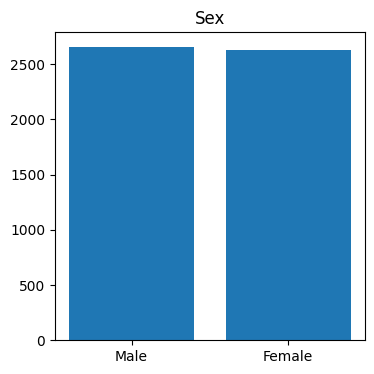

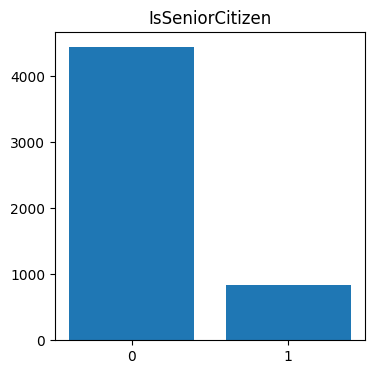

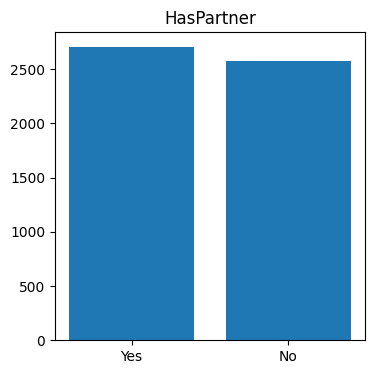

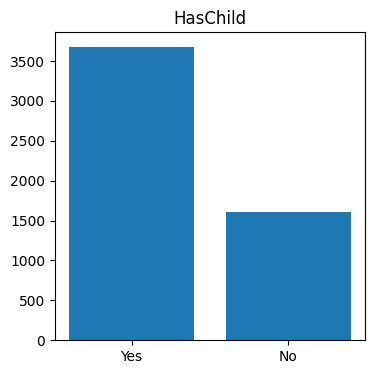

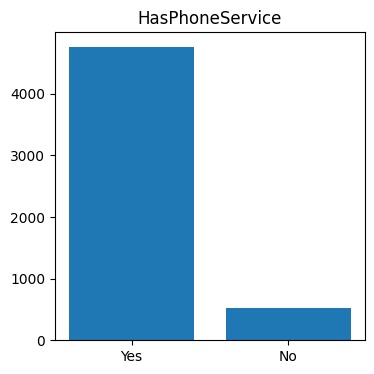

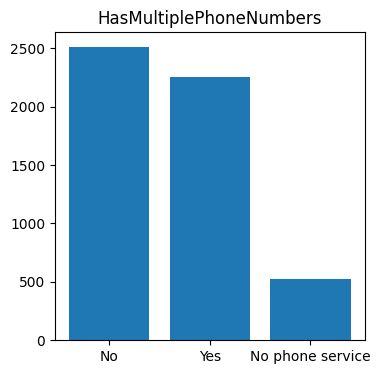

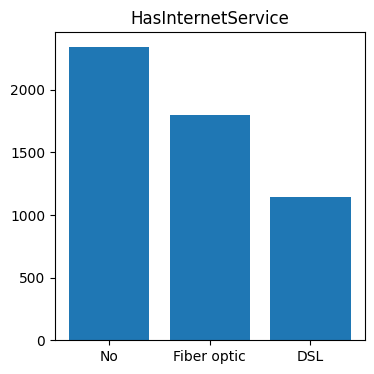

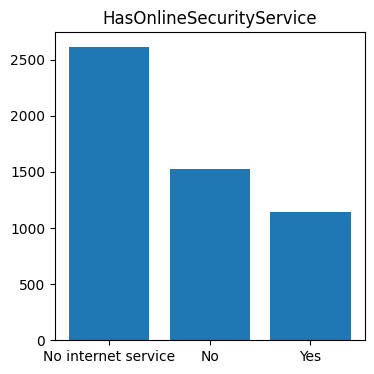

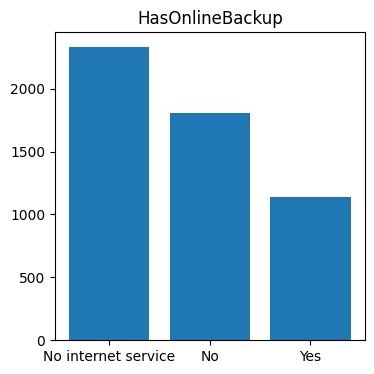

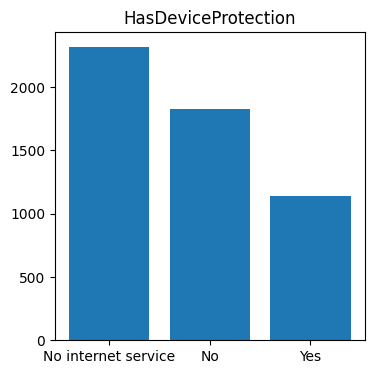

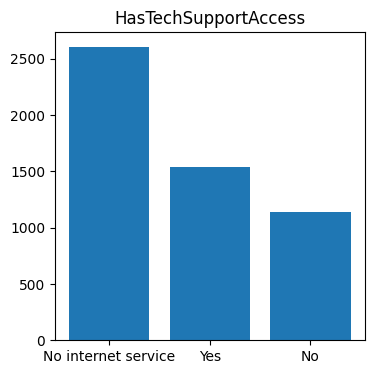

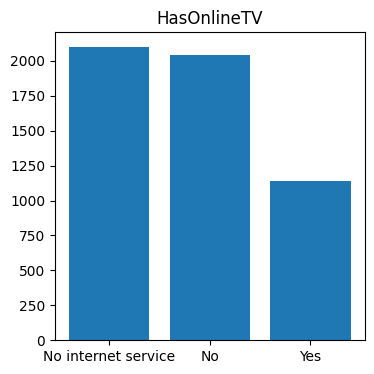

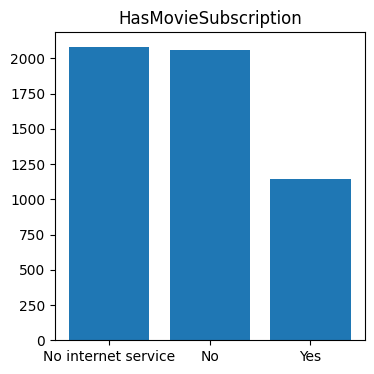

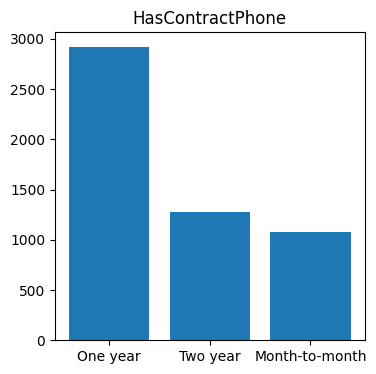

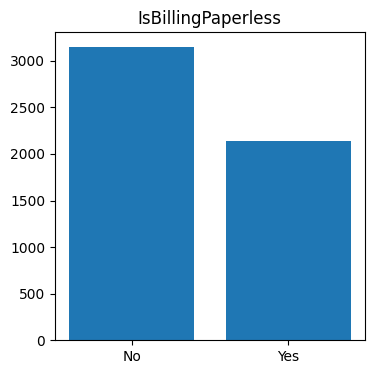

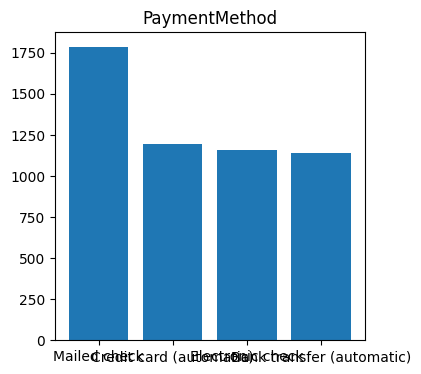

In [18]:
#fig, axs = plt.subplots(4, 4, figsize = (12, 8));
#i = 0
for col in cat_cols:
    fig = plt.figure(figsize = (4 ,4))
    plt.bar(train_data[col].unique(), train_data[col].value_counts().values) # Столбчатая диаграмма для каждого из категориальных признаков
    plt.title(col)
    #axs[i // 4, i % 4].bar(train_data[col].unique(), train_data[col].value_counts().values)
    #i += 1

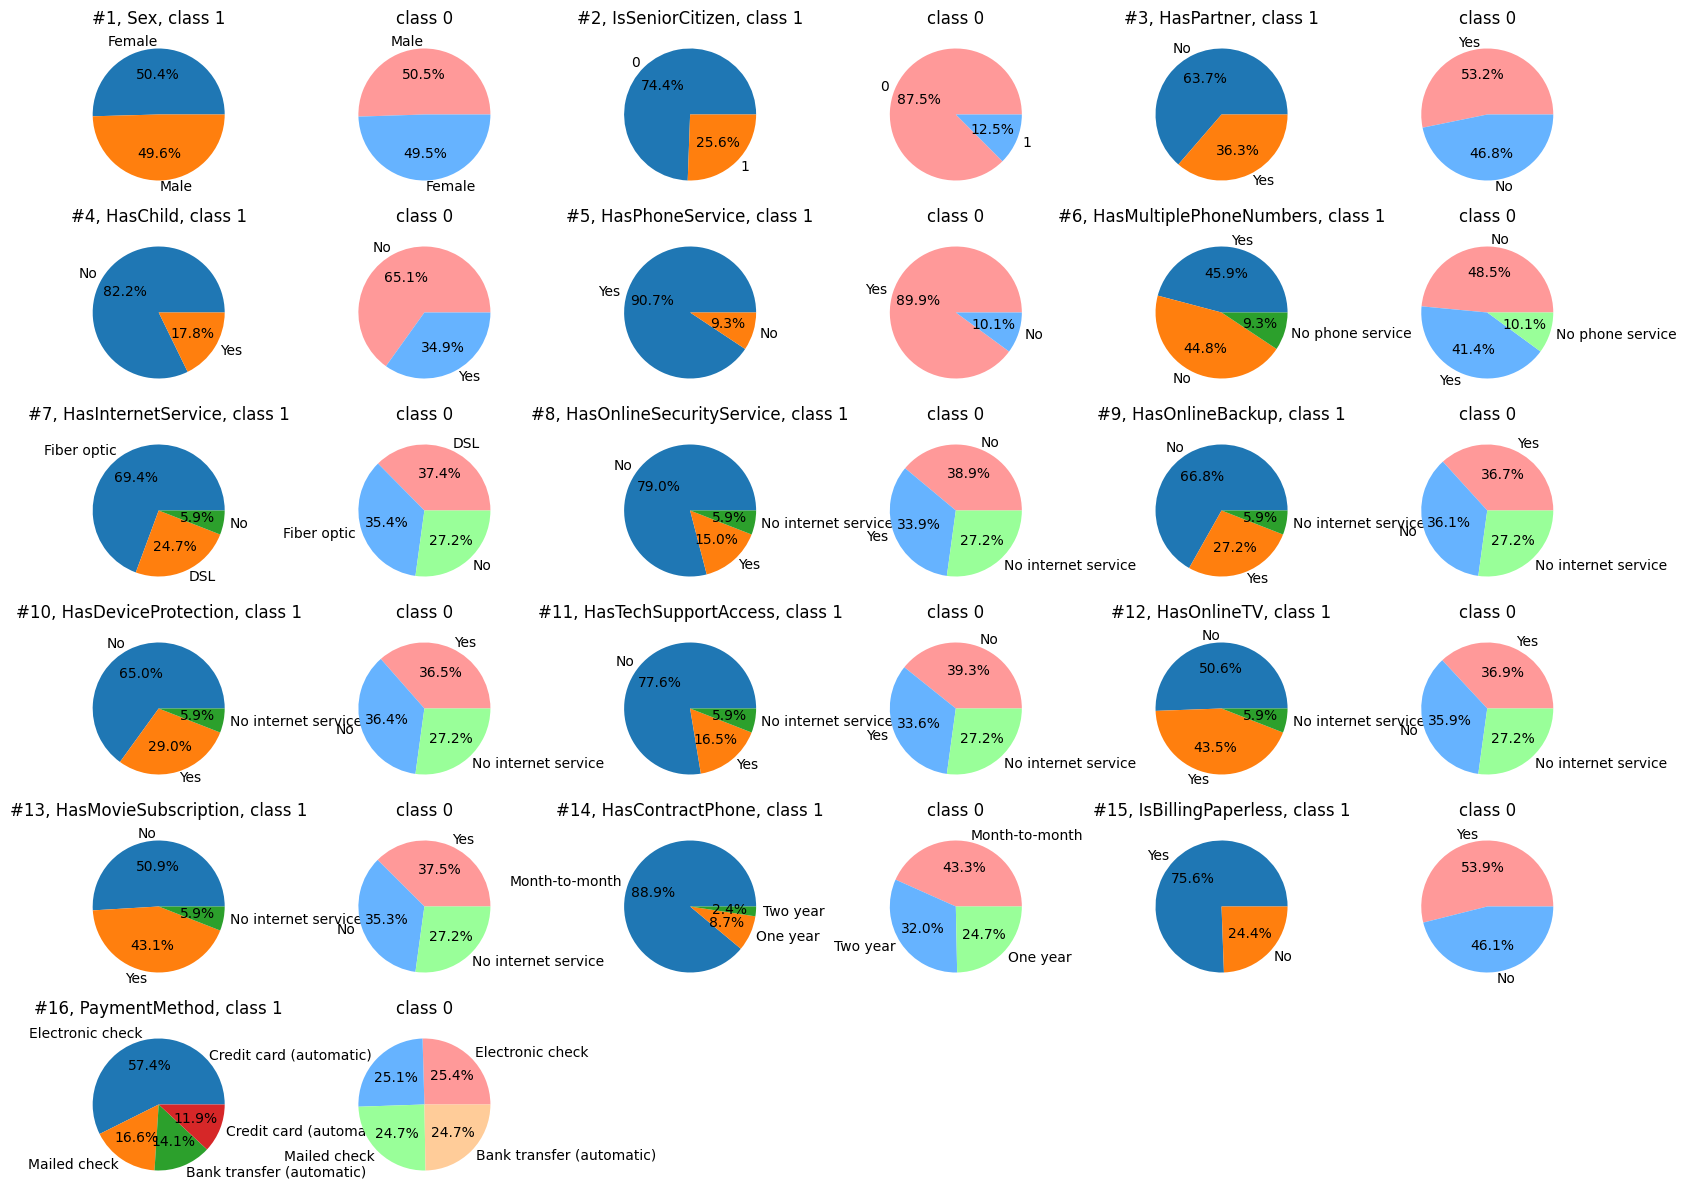

In [19]:
plt.figure(figsize=(20,15))
ncol = 6
nrow = np.ceil(2 * len(cat_cols) / ncol).astype(int)

for i, col in enumerate(cat_cols):
    ax = plt.subplot(nrow, ncol, 2 * i + 1)
    col_val = train_data.loc[train_data[target] == 1 , col].value_counts()
    ax.pie(col_val, labels = col_val.index, autopct = "%.1f%%")
    plt.title(f'#{i+1}, {col}, class 1')
    
    ax = plt.subplot(nrow, ncol, 2 * i+2)
    col_val2 = train_data.loc[train_data[target] == 0 , col].value_counts()    
    ax.pie(col_val2, labels = col_val2.index, autopct="%.1f%%", colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']);
    plt.title(f'class 0')
     

In [20]:
train_data[target].value_counts() # Видим, что данные несбалансированы

0    3898
1    1384
Name: Churn, dtype: int64

In [21]:
(train_data["ClientPeriod"] * train_data["MonthlySpending"] - train_data["TotalSpent"]).max() #Проверка, похож ли столбец "TotalSpent" 
                                                                                              #по значениям на "MonthlySpending * ClientPeriod"

370.84999999999945

In [22]:
train_data[["PaymentMethod", "Churn"]].groupby(["PaymentMethod"]).mean() #Далее смотрим корреляцию количества
                                                                         # ушедших клиентов с некоторыми из признаков

,Churn
PaymentMethod,
Bank transfer (automatic),0.168248
Credit card (automatic),0.144357
Electronic check,0.444569
Mailed check,0.192630


In [23]:
train_data[["HasContractPhone", "Churn"]].groupby(["HasContractPhone"]).mean() 

,Churn
HasContractPhone,
Month-to-month,0.421575
One year,0.110906
Two year,0.025781


In [24]:
train_data[["HasPartner", "Churn"]].groupby(["HasPartner"]).mean() 

,Churn
HasPartner,
No,0.325693
Yes,0.195188


In [25]:
train_data[["HasChild", "Churn"]].groupby(["HasChild"]).mean()

,Churn
HasChild,
No,0.309576
Yes,0.153176


In [26]:
train_data[["HasInternetService", "Churn"]].groupby(["HasInternetService"]).mean() 

,Churn
HasInternetService,
DSL,0.190000
Fiber optic,0.410081
No,0.071867


In [27]:
train_data[["IsSeniorCitizen", "Churn"]].groupby(["IsSeniorCitizen"]).mean() 

,Churn
IsSeniorCitizen,
0,0.231982
1,0.420428


In [28]:
train_data[["HasTechSupportAccess", "Churn"]].groupby(["HasTechSupportAccess"]).mean() 

,Churn
HasTechSupportAccess,
No,0.412442
No internet service,0.071867
Yes,0.148341


In [29]:
train_data[["HasMultiplePhoneNumbers", "Churn"]].groupby(["HasMultiplePhoneNumbers"]).mean() 

,Churn
HasMultiplePhoneNumbers,
No,0.246914
No phone service,0.247601
Yes,0.282222


In [30]:
train_data[["Sex", "Churn"]].groupby(["Sex"]).mean() #Видим, что пол практически никак не влияет на решение клиента уйти 
                                                    # (Учитывая, что мужчин и женщин в выборке практически поровну)

,Churn
Sex,
Female,0.265702
Male,0.258380


In [31]:
corr_matrix = train_data.corr()
corr_matrix["Churn"].sort_values(ascending = False) # Смотрим коэффициент корреляции с числовыми признаками

Churn              1.000000
MonthlySpending    0.184769
TotalSpent        -0.200033
ClientPeriod      -0.350640
Name: Churn, dtype: float64

In [32]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline, Pipeline

# Pipeline преобразований

In [33]:
num_pipe = Pipeline([
    ('rob_scale', RobustScaler()),
])
cat_pipe = Pipeline([
    #('label_enc', LabelEncoder()),
    ('one_hot_enc', OneHotEncoder(sparse = False)),
])

In [34]:
from sklearn.compose import ColumnTransformer

In [35]:
preprocess_pipe = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols),
])c

In [36]:
X_train = preprocess_pipe.fit_transform(train_data)

In [37]:
y = train_data[target]

In [38]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.565217,-0.932448,-0.111576,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.934783,-0.816121,0.137241,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-0.608696,0.100756,-0.391162,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.065217,0.163041,0.342508,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.673913,0.821617,1.574590,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,-0.565217,-0.732768,-0.389323,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5278,0.456522,-0.475384,0.230270,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5279,-0.608696,-0.281200,-0.397295,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5280,0.000000,0.102588,0.238154,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


# логистическая регрессия с выбором лучшего параметра С

In [38]:
grid_param = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             }
grid_search = GridSearchCV(LogisticRegression(random_state = 22, max_iter = 5000), grid_param, cv = 4, 
                           verbose = 10, n_jobs = -1, scoring = "roc_auc")
grid_search.fit(X_train, y)
cvres = grid_search.cv_results_
for model, result in zip(cvres['mean_test_score'], cvres['params']):
    print(model, result) # Лучший результат для C = 100

Fitting 4 folds for each of 6 candidates, totalling 24 fits
0.8333190970266198 {'C': 0.001}
0.8395694154432922 {'C': 0.01}
0.8422634860302959 {'C': 0.1}
0.8438659885038267 {'C': 1}
0.844255815726451 {'C': 10}
0.8442609240885522 {'C': 100}


In [39]:
from scipy.stats import uniform # Попробуем получить ещё лучший результат, использую RandomizedSearchCV 
from sklearn.model_selection import RandomizedSearchCV
param_distrib = {'C' : uniform(80, 120)}
rand_search = RandomizedSearchCV(LogisticRegression(random_state = 42), param_distrib, n_iter = 20,
                                n_jobs = -1, scoring = 'roc_auc', cv = 4)
rand_search.fit(X_train, y)
cvres = rand_search.cv_results_
for model, result in zip(cvres['mean_test_score'], cvres['params']):
    print(model, result)

0.8442564715811026 {'C': 96.70516911841361}
0.844252026682176 {'C': 118.92453838328649}
0.8442572118903556 {'C': 94.89478321344914}
0.844240157386856 {'C': 141.0748727143663}
0.8442446060900441 {'C': 142.62071615755656}
0.8442431239498336 {'C': 141.3247591872988}
0.8442394109907849 {'C': 195.88183204878987}
0.8442483129622749 {'C': 163.71682021353695}
0.8442408954135521 {'C': 185.77377471001023}
0.8442446053291919 {'C': 153.68744207479133}
0.8442446030466352 {'C': 171.6618514652095}
0.8442512840903662 {'C': 121.63324595071208}
0.8442446053291919 {'C': 157.11964716245257}
0.8442483175273885 {'C': 124.90660537520354}
0.8442512840903662 {'C': 121.88217275944146}
0.8442416380053619 {'C': 182.7614179193865}
0.8442564715811027 {'C': 94.18833084836015}
0.8442386683989752 {'C': 198.72236989077058}
0.8442535095832386 {'C': 119.3092551964204}
0.8442423798363194 {'C': 183.17925613902693}


In [40]:
print("Best score: ", rand_search.best_score_)
print("Best estimator ", rand_search.best_estimator_)  # Видим, что лучший результат доистигается при C = 100

Best score:  0.8442572118903556
Best estimator  LogisticRegression(C=94.89478321344914, random_state=42)


In [39]:
test_data["TotalSpent"].replace(' ', '0', inplace = True)
test_data["TotalSpent"] = test_data["TotalSpent"].apply(lambda x : float(x))
test_data['IsSeniorCitizen'] = test_data['IsSeniorCitizen'].apply(lambda x: str(x))
X_test = preprocess_pipe.transform(test_data)

In [42]:
best_log_reg = grid_search.best_estimator_
y_pred_log_reg = best_log_reg.predict_proba(X_test)[:, 1]

In [64]:
submission = pd.read_csv('datasets/churn/submission.csv')

submission['Churn'] = y_pred_log_reg
submission.to_csv('datasets/churn/my_submission_log_reg.csv', index = False) #Результат - 0.72607

In [44]:
y_pred_log_reg

array([0.03827436, 0.73201929, 0.67528701, ..., 0.73846768, 0.63723757,
       0.01034678])

# Стратификационная выборка с логистической регрессией 

In [45]:
from sklearn.model_selection import StratifiedShuffleSplit # Поделим train_data на обучающую и валидационную выборку 
                                                           # Таким образом, чтобы доля тех, кто ушёл и кто остался 
                                                           #в обоих наборах была одинаковой
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 42)

In [46]:
for train_idx, test_idx in split.split(train_data, train_data["Churn"]):
    strat_train_set = train_data.loc[train_idx]
    strat_test_set = train_data.loc[test_idx]
    y_strat_train = y.loc[train_idx]
    y_strat_test = y.loc[test_idx]


In [47]:
train_data["Churn"].value_counts() / len(train_data)

0    0.737978
1    0.262022
Name: Churn, dtype: float64

In [48]:
strat_train_set["Churn"].value_counts() / len(strat_train_set)

0    0.737896
1    0.262104
Name: Churn, dtype: float64

In [49]:
strat_test_set["Churn"].value_counts() / len(strat_test_set)

0    0.73817
1    0.26183
Name: Churn, dtype: float64

In [50]:
X_strat_train = preprocess_pipe.fit_transform(strat_train_set)
X_strat_test = preprocess_pipe.fit_transform(strat_test_set)

In [51]:
pd.DataFrame(X_strat_train)

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,-0.586957,-0.317522,-0.386367,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.804348,-0.336883,0.610166,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.760870,0.656341,1.496195,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,-0.304348,0.184898,-0.093599,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.065217,-0.212004,0.129911,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3692,-0.195652,0.317522,0.069056,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3693,-0.086957,0.291384,0.204247,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3694,0.782609,0.544046,1.432476,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3695,0.760870,0.234269,1.106547,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [52]:
from sklearn.metrics import f1_score
grid_search = GridSearchCV(LogisticRegression(random_state = 22, max_iter = 5000), grid_param, cv = 3, n_jobs = -1,
                          scoring = 'roc_auc')
grid_search.fit(X_strat_train, y_strat_train)
cvres = grid_search.cv_results_
for model, result in zip(cvres['mean_test_score'], cvres['params']):
    print(model, result)

0.8285278272664472 {'C': 0.001}
0.836271947259594 {'C': 0.01}
0.8383992857263248 {'C': 0.1}
0.8394277642645358 {'C': 1}
0.8391353410281773 {'C': 10}
0.8387010484012599 {'C': 100}


In [53]:
param_distr = {'C': uniform(0.1, 10)}
rand_search_strat_log = RandomizedSearchCV(LogisticRegression(random_state = 22, max_iter = 5000), param_distr,
                                          cv = 3, scoring = 'roc_auc', n_iter = 22, n_jobs = -1, verbose = 10)
rand_search_strat_log.fit(X_strat_train, y_strat_train)
cvres_strat = rand_search_strat_log.cv_results_
for model, result in zip(cvres_strat['mean_test_score'], cvres_strat['params']):
    print(model, result)
print("Best estimator: ", rand_search_strat_log.best_estimator_)
print("Best score: ", rand_search_strat_log.best_score_)

Fitting 3 folds for each of 22 candidates, totalling 66 fits
0.8393530487559241 {'C': 4.05282649949129}
0.8392714415750312 {'C': 7.427256521888337}
0.8387182800771372 {'C': 0.16741434956731963}
0.8393722553625077 {'C': 2.3509453129539337}
0.8394040725815853 {'C': 3.053700918528411}
0.8393802785964756 {'C': 3.7514494229158935}
0.8393813864540038 {'C': 3.222112598102038}
0.8393315153990137 {'C': 4.525718804511033}
0.8392793774778878 {'C': 7.1128833657062405}
0.8392306230135369 {'C': 8.216757517489887}
0.8392691647281967 {'C': 7.200359355898361}
0.8390792507504642 {'C': 0.29348613324836614}
0.8393882144993325 {'C': 3.6823683851707076}
0.8393406040725416 {'C': 5.143776021369241}
0.8392702825664234 {'C': 6.209920013286785}
0.8393791208354554 {'C': 3.2490432396158933}
0.8391194542514163 {'C': 10.061069949477174}
0.8393439763010311 {'C': 4.21855240418003}
0.8392533066459439 {'C': 7.8256630079881475}
0.8392362895550831 {'C': 8.082838143101306}
0.8393800952011418 {'C': 1.4604812265566314}
0.839

In [54]:
best_estim = grid_search.best_estimator_
y_pred_log_reg = best_estim.predict(X_strat_test)
f1_score(y_pred_log_reg, y_strat_test)

0.6020408163265306

In [55]:
#best_strat_log_reg = grid_search.best_estimator_
y_pred_strat_log = best_estim.predict(X_test)
submission['Churn'] = y_pred_strat_log
submission.to_csv('datasets/churn/my_submission_strat_log_reg.csv', index = False) #Результат - 0.72475

# Catboost

In [221]:
!pip install catboost

     ---------------------------------------- 73.9/73.9 MB 8.2 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00
     --------------------------------------- 15.2/15.2 MB 10.7 MB/s eta 0:00:00


In [56]:
X_train_origin, X_test_origin, y_train_origin, y_test_origin = train_test_split(train_data[feature_cols], y, 
                                                                               random_state = 22, test_size = 0.2)

In [57]:
import catboost
boosting_model = catboost.CatBoostClassifier(n_estimators = 200, cat_features = cat_cols)
boosting_model.fit(X_train_origin, y_train_origin)
y_train_predicted = boosting_model.predict(X_train_origin)
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]
f1_score(y_test_predicted, y_test_origin)
#boosting_model.fit(strat_train_set[feature_cols], y_strat_train)
#y_test_predicted = boosting_model.predict(strat_test_set[feature_cols])
#f1_score(y_test_predicted, y_strat_test)

Learning rate set to 0.083391
0:	learn: 0.6401854	total: 180ms	remaining: 35.9s
1:	learn: 0.5992076	total: 211ms	remaining: 20.9s
2:	learn: 0.5664683	total: 242ms	remaining: 15.9s
3:	learn: 0.5401927	total: 273ms	remaining: 13.4s
4:	learn: 0.5164270	total: 305ms	remaining: 11.9s
5:	learn: 0.5007938	total: 322ms	remaining: 10.4s
6:	learn: 0.4862262	total: 353ms	remaining: 9.74s
7:	learn: 0.4754818	total: 384ms	remaining: 9.21s
8:	learn: 0.4635056	total: 413ms	remaining: 8.77s
9:	learn: 0.4555367	total: 444ms	remaining: 8.43s
10:	learn: 0.4466109	total: 474ms	remaining: 8.14s
11:	learn: 0.4422587	total: 493ms	remaining: 7.73s
12:	learn: 0.4367483	total: 524ms	remaining: 7.54s
13:	learn: 0.4306616	total: 554ms	remaining: 7.36s
14:	learn: 0.4269511	total: 584ms	remaining: 7.2s
15:	learn: 0.4231096	total: 614ms	remaining: 7.06s
16:	learn: 0.4199961	total: 658ms	remaining: 7.08s
17:	learn: 0.4171030	total: 687ms	remaining: 6.94s
18:	learn: 0.4140382	total: 716ms	remaining: 6.82s
19:	learn: 0

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [58]:
y_pred_cat_boost = boosting_model.predict_proba(test_data)[:, 1]


In [59]:
y_boost_cat = boosting_model.predict_proba(test_data)

In [60]:
#submission = pd.read_csv('datasets/churn/submission.csv')

submission['Churn'] = y_pred_cat_boost
submission.to_csv('datasets/churn/my_submission.csv', index = False) #Результат - 0.72322

In [61]:
boosting_model.get_feature_importance(prettified = True)

,Feature Id,Importances
0,HasContractPhone,16.052603
1,MonthlySpending,11.732683
2,TotalSpent,11.179447
3,ClientPeriod,9.564002
4,HasOnlineSecurityService,6.159089
5,PaymentMethod,6.011365
6,HasMultiplePhoneNumbers,5.336424
7,HasTechSupportAccess,5.163913
8,HasInternetService,5.069660
9,HasMovieSubscription,3.986206


# Стекинг

In [62]:
def compute_meta_feature(model, X_train, X_test, y_train, cv):
    try:
        train_answers = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba')[:, 1]
        model.fit(X_train, y_train)
        return train_answers, model.predict_proba(X_test)[:, 1]
    
    except Exception:
        train_answers = cross_val_predict(model, X_train, y_train, cv=cv, method='predict')[:, 1]
        model.fit(X_train, y_train)
        return train_answers, model.predict(X_test)[:, 1]

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

In [58]:
models = []
#models.append(KNeighborsClassifier(n_jobs=-1, n_neighbors=30))
models.append(LogisticRegression(max_iter = 5000, C = 100))
models.append(RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1))
models.append(RandomForestClassifier(max_depth=15, n_estimators=90, n_jobs=-1))
models.append(DecisionTreeClassifier(max_depth=10))

In [59]:
meta_features_train = np.zeros((X_train.shape[0], 0))
meta_features_test = np.zeros((X_test.shape[0], 0))

In [60]:
for model in models:
    train, test = compute_meta_feature(model, X_train, X_test, y, 5)
    meta_features_train = np.append(meta_features_train, train.reshape((train.size, 1)), axis=1)
    meta_features_test = np.append(meta_features_test, test.reshape((test.size, 1)), axis=1)

In [61]:
stacking_model = LogisticRegression(max_iter = 500, C = 1)
stacking_model.fit(meta_features_train, y)
y_train_predicted = stacking_model.predict_proba(meta_features_train)[:, 1]
y_test_predicted = stacking_model.predict_proba(meta_features_test)[:, 1]

In [63]:
submission['Churn'] = y_test_predicted
submission.to_csv('datasets/churn/my_submission_stacking.csv', index = False) #Результат - 0.71840

# Инженерия признаков

In [137]:
train_data_val = train_data[feature_cols]
train_data_val = train_data_val.drop(["Sex"], axis = 1) #Кажется, пол никак не влияет на результат

In [116]:
#train_data_val['PeriodBucket'] = train_data_val['ClientPeriod'] // 12 #Смотрим, сколько лет клиент с нами

In [117]:
#train_data_val["SpentBucket"] = train_data_val['TotalSpent'] // 1000 #Делим пользователей на 3 категории по затратам

In [139]:
#train_data_val['WithoutInternet'] = ((train_data_val["HasInternetService"] == 'No').values).astype(np.int64)
#train_data_val["TwoYearContract"] = ((train_data_val["HasContractPhone"] == 'Two year').values).astype(np.int64)

In [119]:
#train_data_val['SpentBucket'] = train_data_val['SpentBucket'].apply(lambda x : int(x))

In [140]:
#train_data_val['PeriodBucket'] = train_data_val['PeriodBucket'].apply(lambda x : str(x))
#train_data_val['SpentBucket'] = train_data_val['SpentBucket'].apply(lambda x : str(x))
train_data_val['WithoutInternet'] = train_data_val['WithoutInternet'].apply(lambda x : str(x))
train_data_val['TwoYearContract'] = train_data_val['TwoYearContract'].apply(lambda x : str(x))

In [141]:
num_cols_val = num_cols
cat_cols_val = cat_cols
#cat_cols_val.append("PeriodBucket")
#cat_cols_val.append("SpentBucket")
cat_cols_val.append('WithoutInternet')
cat_cols_val.append('TwoYearContract')
cat_cols_val.remove('Sex')
#num_cols_val.remove('ClientPeriod')
#num_cols_val.remove('TotalSpent')

In [121]:
#train_data_val = train_data_val.drop(['ClientPeriod'], axis = 1)
#train_data_val = train_data_val.drop(['TotalSpent'], axis = 1)

In [146]:
preprocess_pipe_val = ColumnTransformer([
    ("num", num_pipe, num_cols_val),
    ("cat", cat_pipe, cat_cols_val),
])

In [147]:
X_train_clean = preprocess_pipe_val.fit_transform(train_data_val)

In [148]:
test_data_val = test_data
test_data_val = test_data_val.drop(['Sex'], axis = 1)
#test_data_val['PeriodBucket'] = test_data_val['ClientPeriod'] // 12
#test_data_val["SpentBucket"] = test_data_val['TotalSpent'] // 1000
test_data_val['WithoutInternet'] = ((test_data_val["HasInternetService"] == 'No').values).astype(np.int64)
test_data_val["TwoYearContract"] = ((test_data_val["HasContractPhone"] == 'Two year').values).astype(np.int64)

In [124]:
#test_data_val['SpentBucket'] = test_data_val['SpentBucket'].apply(lambda x : int(x))

In [149]:
#test_data_val['PeriodBucket'] = test_data_val['PeriodBucket'].apply(lambda x : str(x))
#test_data_val['SpentBucket'] = test_data_val['SpentBucket'].apply(lambda x : str(x))
test_data_val['WithoutInternet'] = test_data_val['WithoutInternet'].apply(lambda x : str(x))
test_data_val['TwoYearContract'] = test_data_val['TwoYearContract'].apply(lambda x : str(x))

In [126]:
#test_data_val = test_data_val.drop(['ClientPeriod'], axis = 1)
#test_data_val = test_data_val.drop(['TotalSpent'], axis = 1)

In [150]:
test_data_val

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,WithoutInternet,TwoYearContract
0,42,56.10,2386.85,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic),0,0
1,29,98.50,3004.15,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0,0
2,9,76.25,684.85,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0,0
3,67,74.00,4868.40,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic),0,1
4,71,20.10,1389.60,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,71,105.15,7555.00,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),0,1
1757,13,20.85,272.35,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,1,1
1758,2,91.45,171.45,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,0,0
1759,19,89.10,1620.80,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,0,0


In [151]:
X_test_clean = preprocess_pipe_val.transform(test_data_val)

## Логистическая регрессия

In [152]:
param_grid = {'C': np.arange(0.1, 100, 0.1)}
grid_search = GridSearchCV(LogisticRegression(random_state = 22, max_iter = 5000), param_grid, n_jobs = -1, cv = 5,
                          scoring = 'roc_auc')
grid_search.fit(X_train_clean, y)
cvres_ = grid_search.cv_results_
for model, result in zip(cvres_['mean_test_score'], cvres_['params']):
    print(model, result)

0.8429917281812079 {'C': 0.1}
0.8437598169762441 {'C': 0.2}
0.8441247135325798 {'C': 0.30000000000000004}
0.8443961170411278 {'C': 0.4}
0.8445369780177796 {'C': 0.5}
0.8445851857580271 {'C': 0.6}
0.8446787618862726 {'C': 0.7000000000000001}
0.84474634333745 {'C': 0.8}
0.8447917182222303 {'C': 0.9}
0.8448120282189644 {'C': 1.0}
0.8448416287308389 {'C': 1.1}
0.844868499956894 {'C': 1.2000000000000002}
0.8448925715433045 {'C': 1.3000000000000003}
0.8449463243454908 {'C': 1.4000000000000001}
0.8449555774686128 {'C': 1.5000000000000002}
0.8449824517041119 {'C': 1.6}
0.8449981815768564 {'C': 1.7000000000000002}
0.844999105213524 {'C': 1.8000000000000003}
0.8450213516604353 {'C': 1.9000000000000001}
0.8450621429338876 {'C': 2.0}
0.845060293129003 {'C': 2.1}
0.8450816074103363 {'C': 2.2}
0.8450825052708366 {'C': 2.3000000000000003}
0.8451010315068495 {'C': 2.4000000000000004}
0.8451000805397811 {'C': 2.5000000000000004}
0.845115819918752 {'C': 2.6}
0.8451074723411909 {'C': 2.7}
0.8451158181750

In [153]:
print(grid_search.best_estimator_)
print(grid_search.best_score_)

LogisticRegression(C=7.1, max_iter=5000, random_state=22)
0.8452037577654871


In [154]:
param_distrib = {'C' : uniform(1, 10)}
rand_search_clean = RandomizedSearchCV(LogisticRegression(max_iter = 5000, random_state = 22), param_distrib,
                                      cv = 5, n_jobs = -1, verbose = 10, n_iter = 22, scoring = 'roc_auc')
rand_search_clean.fit(X_train_clean, y)
cvres_clean = rand_search_clean.cv_results_
for model, result in zip(cvres_clean['mean_test_score'], cvres_clean['params']):
    print(model, result)
print("Best estimator: ", rand_search_clean.best_estimator_)
print("Best score: ", rand_search_clean.best_score_)

Fitting 5 folds for each of 22 candidates, totalling 110 fits
0.8451815504327362 {'C': 10.81229750118743}
0.8451195177073556 {'C': 3.0329898862112428}
0.8451676476541227 {'C': 10.359838684285434}
0.8451760043159853 {'C': 10.8832361432165}
0.8451658548865965 {'C': 4.382651634380448}
0.8452037551779679 {'C': 6.942833621562389}
0.8450426817338151 {'C': 1.9228032478479387}
0.8451750591568421 {'C': 10.156401700217279}
0.8451972833924211 {'C': 7.44485012623757}
0.8451889346265817 {'C': 8.145121056636533}
0.8450185645924309 {'C': 1.872497393233096}
0.8451796763284214 {'C': 5.547488922725594}
0.8451972626362991 {'C': 6.623228714461732}
0.8451972756298639 {'C': 6.2894902356024245}
0.8451778306437626 {'C': 9.733007855573724}
0.8451482075761273 {'C': 3.707488299962413}
0.8451861461593365 {'C': 8.286701897666836}
0.8448545811752715 {'C': 1.1517779098650462}
0.8451991308207492 {'C': 7.479953241865904}
0.8451519137386487 {'C': 4.806401383483113}
0.8452055940773855 {'C': 6.736452760615522}
0.84519449

In [155]:
best_log_clean = rand_search_clean.best_estimator_
y_pred_log_clean = best_log_clean.predict_proba(X_test_clean)[:, 1]
submission['Churn'] = y_pred_log_clean
submission.to_csv('datasets/churn/my_submission_log_clean.csv', index = False)  #Результат - 0.72145

## SVC

In [156]:
from sklearn.svm import SVC
param_grid_svc = {'kernel' : ['rbf', 'poly'],
                 'degree' : [2,3],
                 'C' : [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_svc = GridSearchCV(SVC(probability = True), param_grid_svc, cv = 4,
                          scoring = 'roc_auc', n_jobs = -1, verbose = 10)
grid_search_svc.fit(X_train_clean, y)
cvres_svc = grid_search_svc.cv_results_
for model, result in zip(cvres_svc['mean_test_score'], cvres_svc['params']):
    print(model, result)
print(grid_search_svc.best_estimator_)
print(grid_search_svc.best_score_)

Fitting 4 folds for each of 24 candidates, totalling 96 fits
0.8195040905700275 {'C': 0.001, 'degree': 2, 'kernel': 'rbf'}
0.8226411924959272 {'C': 0.001, 'degree': 2, 'kernel': 'poly'}
0.8195040905700275 {'C': 0.001, 'degree': 3, 'kernel': 'rbf'}
0.8135771473000855 {'C': 0.001, 'degree': 3, 'kernel': 'poly'}
0.8194048450006985 {'C': 0.01, 'degree': 2, 'kernel': 'rbf'}
0.822641938131146 {'C': 0.01, 'degree': 2, 'kernel': 'poly'}
0.8194048450006985 {'C': 0.01, 'degree': 3, 'kernel': 'rbf'}
0.8139018318735622 {'C': 0.01, 'degree': 3, 'kernel': 'poly'}
0.8108131269993295 {'C': 0.1, 'degree': 2, 'kernel': 'rbf'}
0.8163159483916953 {'C': 0.1, 'degree': 2, 'kernel': 'poly'}
0.8108131269993295 {'C': 0.1, 'degree': 3, 'kernel': 'rbf'}
0.7988664324611227 {'C': 0.1, 'degree': 3, 'kernel': 'poly'}
0.7890474148674793 {'C': 1, 'degree': 2, 'kernel': 'rbf'}
0.8074016153350079 {'C': 1, 'degree': 2, 'kernel': 'poly'}
0.7890474148674793 {'C': 1, 'degree': 3, 'kernel': 'rbf'}
0.7841889988218964 {'C': 1,

In [157]:
best_svc = grid_search_svc.best_estimator_
y_pred_svc_clean = best_svc.predict_proba(X_test_clean)[:, 1]
submission['Churn'] = y_pred_log_clean
submission.to_csv('datasets/churn/my_submission_svc_clean.csv', index = False)  #Результат - 0.85005

## Случайный лес

In [158]:
param_fores = {'n_estimators': [20, 40, 60, 80, 90, 100, 110, 120],
              'max_depth' : [3, 6, 7, 8, 11, 13, 15],
              'min_samples_split': [2, 5, 7],
              'min_samples_leaf': [4, 5, 6, 7, 8]}
grid_search_forest = GridSearchCV(RandomForestClassifier(random_state = 22), param_fores,
                                 cv = 4, n_jobs = -1, verbose = 20, scoring = "roc_auc")
grid_search_forest.fit(X_train_clean, y)
cvres_forest = grid_search_forest.cv_results_
for model, result in zip(cvres_forest['mean_test_score'], cvres_forest['params']):
    print(model, result)
grid_search_forest.best_estimator_

Fitting 4 folds for each of 840 candidates, totalling 3360 fits
0.8364626661967642 {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 20}
0.8388439610699288 {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 40}
0.8383544561138891 {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 60}
0.8381475236997873 {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 80}
0.8384647949092289 {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 90}
0.8381635388790942 {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
0.8381716499446557 {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 110}
0.838326565172018 {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 120}
0.8364626661967642 {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 20}
0.83884

RandomForestClassifier(max_depth=6, min_samples_leaf=7, n_estimators=120,
                       random_state=22)

In [159]:
grid_search_forest.best_score_

0.8435695692115349

In [160]:
best_forest_clean = grid_search_forest.best_estimator_
y_pred_forest_clean = best_forest_clean.predict_proba(X_test_clean)[:, 1]
submission['Churn'] = y_pred_forest_clean
submission.to_csv('datasets/churn/my_submission_forest_clean.csv', index = False)  #Результат - 0.69281

# Бустинг

In [161]:
cat_boost_ = catboost.CatBoostClassifier(n_estimators = 250, cat_features = cat_cols)
cat_boost_.fit(train_data_val, y)
y_predicted_clean = cat_boost_.predict_proba(test_data_val)[:, 1]
y_train_boost = cat_boost_.predict(train_data_val)
f1_score(y_train_boost, y)

Learning rate set to 0.074758
0:	learn: 0.6427602	total: 71.3ms	remaining: 17.8s
1:	learn: 0.6019912	total: 133ms	remaining: 16.5s
2:	learn: 0.5697395	total: 165ms	remaining: 13.6s
3:	learn: 0.5432681	total: 197ms	remaining: 12.1s
4:	learn: 0.5213464	total: 230ms	remaining: 11.3s
5:	learn: 0.5042970	total: 262ms	remaining: 10.6s
6:	learn: 0.4882174	total: 293ms	remaining: 10.2s
7:	learn: 0.4776310	total: 325ms	remaining: 9.82s
8:	learn: 0.4690601	total: 346ms	remaining: 9.26s
9:	learn: 0.4598062	total: 377ms	remaining: 9.04s
10:	learn: 0.4533257	total: 403ms	remaining: 8.75s
11:	learn: 0.4484121	total: 425ms	remaining: 8.42s
12:	learn: 0.4419485	total: 460ms	remaining: 8.39s
13:	learn: 0.4371628	total: 496ms	remaining: 8.37s
14:	learn: 0.4326297	total: 527ms	remaining: 8.26s
15:	learn: 0.4294833	total: 559ms	remaining: 8.18s
16:	learn: 0.4253789	total: 591ms	remaining: 8.1s
17:	learn: 0.4220239	total: 624ms	remaining: 8.04s
18:	learn: 0.4197339	total: 665ms	remaining: 8.09s
19:	learn: 

0.6496204554534558

In [162]:
submission['Churn'] = y_predicted_clean
submission.to_csv('datasets/churn/cat_boost_clean.csv', index = False) #Результат - 0.85183

### Апсемплинг, удаление дубликатов без добавления новых признаков

In [41]:
from sklearn.utils import shuffle

In [42]:
train_data.drop(['Churn'], axis = 1).duplicated(keep = False).sum()

41

In [43]:
idx_wrong_dup = train_data[train_data.drop(['Churn'], axis = 1).duplicated(keep = False) & train_data.duplicated(keep = False).apply(lambda x: not x)].sort_values(by = [*train_data.columns]).index
train_data = train_data.drop(idx_wrong_dup) # Удаляем строчки, имеющие одинаковые признаки, но разное значение Churn

In [44]:
train_data.drop(['Churn'], axis = 1).duplicated(keep = False).sum()

28

In [45]:
def upsample(rand_seed, features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=rand_seed)
    
    return features_upsampled, target_upsampled

In [46]:
X_train = train_data[feature_cols]
y_train = train_data[target]

In [47]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, 
                                                     y_train, test_size = 0.2, random_state = 22,
                                                     stratify = y_train)

In [48]:
y_train.value_counts(normalize = True)

0    0.738553
1    0.261447
Name: Churn, dtype: float64

In [49]:
y_valid.value_counts(normalize = True)

0    0.739089
1    0.260911
Name: Churn, dtype: float64

In [50]:
X_train_upsampled, y_train_upsampled = upsample(22, X_train, y_train, 
                                                np.ceil(len(train_data[train_data['Churn']== 0]) / len(train_data[train_data['Churn']== 1])).astype(np.int64))

In [51]:
y_train_upsampled.value_counts(normalize = True)

1    0.515033
0    0.484967
Name: Churn, dtype: float64

In [48]:
# Отлично, дисбаланс устранён

## Применение различных алгоритмов

### Логистическая регрессия

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score

In [50]:
X_train_up_preproc = preprocess_pipe.fit_transform(X_train_upsampled)
X_valid_preproc = preprocess_pipe.transform(X_valid)

In [51]:
param_grid_up = {'C': np.arange(0.1, 100, 0.1)}
grid_search_up = GridSearchCV(LogisticRegression(random_state = 22, max_iter = 5000), param_grid_up, n_jobs = -1, cv = 5,
                          scoring = 'roc_auc')
grid_search_up.fit(X_train_up_preproc, y_train_upsampled)
print(grid_search_up.best_score_, grid_search_up.best_estimator_)

0.8466647025835773 LogisticRegression(C=17.3, max_iter=5000, random_state=22)


In [53]:
best_log_up = grid_search_up.best_estimator_
y_pred_valid = best_log_up.predict_proba(X_valid_preproc)[:, 1]
roc_auc_score(y_valid, y_pred_valid)
#submission['Churn'] = y_pred_log_up
#submission.to_csv('datasets/churn/log_up.csv', index = False)

0.8503676041545103

In [52]:
X_train = train_data[feature_cols]
y_train = train_data[target]
X_train_ups, y_train_ups = upsample(22, X_train, y_train, 3)
X_train_up_prep = preprocess_pipe.fit_transform(X_train_ups)
X_test = preprocess_pipe.transform(test_data)

In [56]:
grid_search_up.fit(X_train_up_prep, y_train_ups)
print(grid_search_up.best_score_, grid_search_up.best_estimator_)

0.847890073666097 LogisticRegression(C=41.400000000000006, max_iter=5000, random_state=22)


In [74]:
y_pred_log_up = best_log_up.predict_proba(X_test)[:, 1]
submission['Churn'] = y_pred_log_up
submission.to_csv('datasets/churn/log_up.csv', index = False)

### SVC

In [58]:
from sklearn.svm import SVC

In [102]:
param_grid_svc_up = {'kernel' : ['rbf','poly'],
                     'degree': [2, 3],
                 
                 'C' : np.arange(10, 100, 10)}
grid_search_svc_up = GridSearchCV(SVC(probability = True), param_grid_svc_up, cv = 5,
                          scoring = 'roc_auc', n_jobs = -1, verbose = 10)
grid_search_svc_up.fit(X_train_up_preproc, y_train_upsampled)
cvres_svc = grid_search_svc_up.cv_results_
for model, result in zip(cvres_svc['mean_test_score'], cvres_svc['params']):
    print(model, result)
print(grid_search_svc_up.best_estimator_)
print(grid_search_svc_up.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
0.8842828414736879 {'C': 10, 'degree': 2, 'kernel': 'rbf'}
0.8396048951619293 {'C': 10, 'degree': 2, 'kernel': 'poly'}
0.8842828414736879 {'C': 10, 'degree': 3, 'kernel': 'rbf'}
0.8600602262725403 {'C': 10, 'degree': 3, 'kernel': 'poly'}
0.896304559356321 {'C': 20, 'degree': 2, 'kernel': 'rbf'}
0.8384375739643538 {'C': 20, 'degree': 2, 'kernel': 'poly'}
0.896304559356321 {'C': 20, 'degree': 3, 'kernel': 'rbf'}
0.8589511821751399 {'C': 20, 'degree': 3, 'kernel': 'poly'}
0.9004374867043221 {'C': 30, 'degree': 2, 'kernel': 'rbf'}
0.8384819199364193 {'C': 30, 'degree': 2, 'kernel': 'poly'}
0.9004374867043221 {'C': 30, 'degree': 3, 'kernel': 'rbf'}
0.8574929392085806 {'C': 30, 'degree': 3, 'kernel': 'poly'}
0.9024483345677348 {'C': 40, 'degree': 2, 'kernel': 'rbf'}
0.8381386764314339 {'C': 40, 'degree': 2, 'kernel': 'poly'}
0.9024483345677348 {'C': 40, 'degree': 3, 'kernel': 'rbf'}
0.8541554112743679 {'C': 40, 'degree': 3, 'kerne

In [103]:
best_svc_up = grid_search_svc_up.best_estimator_
y_pred_svc_up = best_svc_up.predict_proba(X_test)[:, 1]
submission['Churn'] = y_pred_svc_up
submission.to_csv('datasets/churn/svc_up.csv', index = False)

In [65]:
y_pred_svc_up

array([1.27228389e-02, 8.95562735e-01, 8.12369321e-01, ...,
       7.67926751e-01, 2.57989458e-01, 3.61999875e-04])

### Дерево

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
param_grid_tree = {
    'max_depth': np.arange(3, 10, 1),
    'min_samples_split': np.arange(2, 10, 1),
    'min_samples_leaf' : np.arange(2, 10, 1)
}
grid_search_tree = GridSearchCV(DecisionTreeClassifier(random_state = 22), param_grid_tree, cv = 5, n_jobs = -1,
                               verbose = 100, scoring = 'roc_auc')
grid_search_tree.fit(X_train_up_preproc, y_train_upsampled)
print(grid_search_tree.best_score_, grid_search_tree.best_estimator_)

Fitting 5 folds for each of 448 candidates, totalling 2240 fits
0.8526158285284373 DecisionTreeClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=7,
                       random_state=22)


In [68]:
best_tree_up = grid_search_tree.best_estimator_
y_pred_tree_up = best_tree_up.predict_proba(X_test)[:, 1]
submission['Churn'] = y_pred_tree_up
submission.to_csv('datasets/churn/tree_up.csv', index = False)

### Случайный лес

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
param_grid_forest = {
    'n_estimators': [70, 80, 90, 100, 110, 120],
    'max_depth': np.arange(3, 9, 1),
    'min_samples_split': np.arange(2, 8, 1),
    'min_samples_leaf' : np.arange(2, 8, 1)
}
grid_search_forest = GridSearchCV(RandomForestClassifier(), param_grid_forest, cv = 5, n_jobs = -1,
                               verbose = 100, scoring = 'roc_auc')
grid_search_forest.fit(X_train_up_preproc, y_train_upsampled)
print(grid_search_forest.best_score_, grid_search_forest.best_estimator_)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
0.8812883116704718 RandomForestClassifier(max_depth=8, min_samples_leaf=2, n_estimators=80)


In [71]:
best_forest_up = grid_search_forest.best_estimator_
y_pred_forest_up = best_forest_up.predict_proba(X_test)[:, 1]
submission['Churn'] = y_pred_forest_up
submission.to_csv('datasets/churn/forest_up.csv', index = False)

### Бустинг

In [53]:
from catboost import Pool, CatBoostClassifier
model_default = CatBoostClassifier(eval_metric = 'AUC', verbose = 3000)

In [54]:
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_cols)
train_upsampled_pool = Pool(data=X_train_upsampled, label=y_train_upsampled, cat_features=cat_cols)
valid_pool = Pool(data=X_valid, label=y_valid, cat_features=cat_cols)

In [76]:
model_default.fit(train_upsampled_pool, eval_set=valid_pool)

Learning rate set to 0.05016
0:	test: 0.8260847	best: 0.8260847 (0)	total: 242ms	remaining: 4m 1s
999:	test: 0.8309114	best: 0.8508484 (131)	total: 33.6s	remaining: 0us

bestTest = 0.850848407
bestIteration = 131

Shrink model to first 132 iterations.


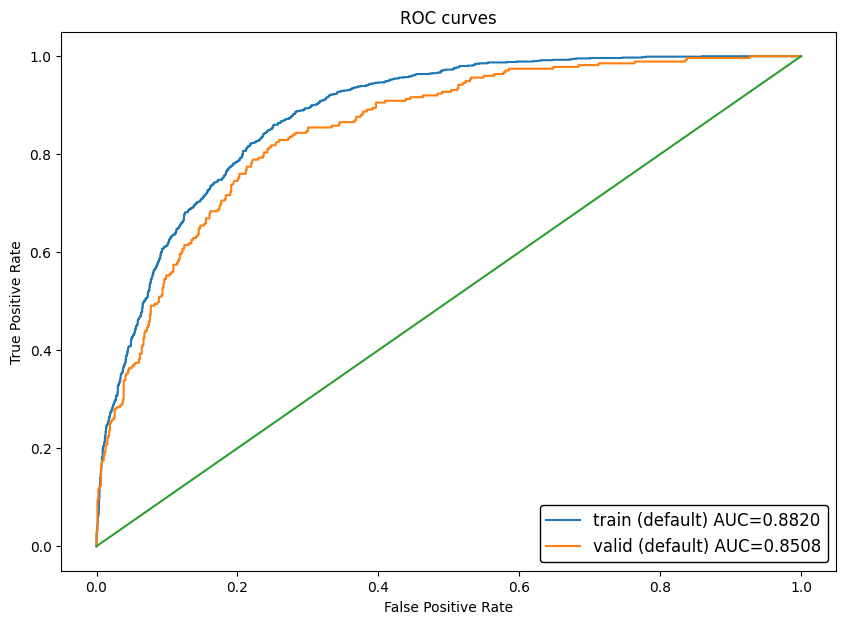

In [77]:
y_train_def_pred = model_default.predict_proba(X_train_upsampled)[:, 1]
y_valid_def_pred = model_default.predict_proba(X_valid)[:, 1]

train_def_auc = roc_auc_score(y_train_upsampled, y_train_def_pred)
valid_def_auc = roc_auc_score(y_valid, y_valid_def_pred)

plt.figure(figsize=(10,7))

plt.plot(*roc_curve(y_train_upsampled, y_train_def_pred)[:2], label=f'train (default) AUC={train_def_auc:.4f}')
plt.plot(*roc_curve(y_valid, y_valid_def_pred)[:2], label=f'valid (default) AUC={valid_def_auc:.4f}')

plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))

legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")

plt.title('ROC curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [78]:
model_grid_search = CatBoostClassifier(eval_metric='AUC', verbose=1000)

In [57]:
grid_cbc = {
            'n_estimators': np.arange(100, 250, 10),
            'learning_rate': np.arange(0.02, 0.07, 0.01), 
            'depth': [3, 4],
            'l2_leaf_reg': [7, 9],
            'min_data_in_leaf': [120, 140]}

In [58]:
model_grid_search2 = CatBoostClassifier(eval_metric='AUC', verbose=1000)

In [59]:
result2 = model_grid_search2.grid_search(param_grid = grid_cbc, X = train_upsampled_pool, verbose = 500)

0:	test: 0.7891963	best: 0.7891963 (0)	total: 193ms	remaining: 19.1s
99:	test: 0.8502571	best: 0.8502571 (99)	total: 1.59s	remaining: 0us

bestTest = 0.8502570585
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8502571	best: 0.8502571 (0)	total: 1.62s	remaining: 16m 12s
0:	test: 0.7891963	best: 0.7891963 (0)	total: 11.6ms	remaining: 1.15s
99:	test: 0.8532801	best: 0.8532801 (99)	total: 1.39s	remaining: 0us

bestTest = 0.8532801343
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	test: 0.7891963	best: 0.7891963 (0)	total: 11.4ms	remaining: 1.13s
99:	test: 0.8558531	best: 0.8558531 (99)	total: 1.41s	remaining: 0us

bestTest = 0.8558531455
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~fals

In [60]:
result2['params']

{'min_data_in_leaf': 120,
 'depth': 4,
 'l2_leaf_reg': 7,
 'iterations': 240,
 'learning_rate': 0.06}

In [91]:
result = model_grid_search.grid_search(param_grid=grid_cbc, X=train_upsampled_pool, verbose=500)

CatBoostError: Model was fitted before hyperparameters tuning. You can't change hyperparameters of fitted model.

In [63]:
result['params']

NameError: name 'result' is not defined

Text(0, 0.5, 'True Positive Rate')

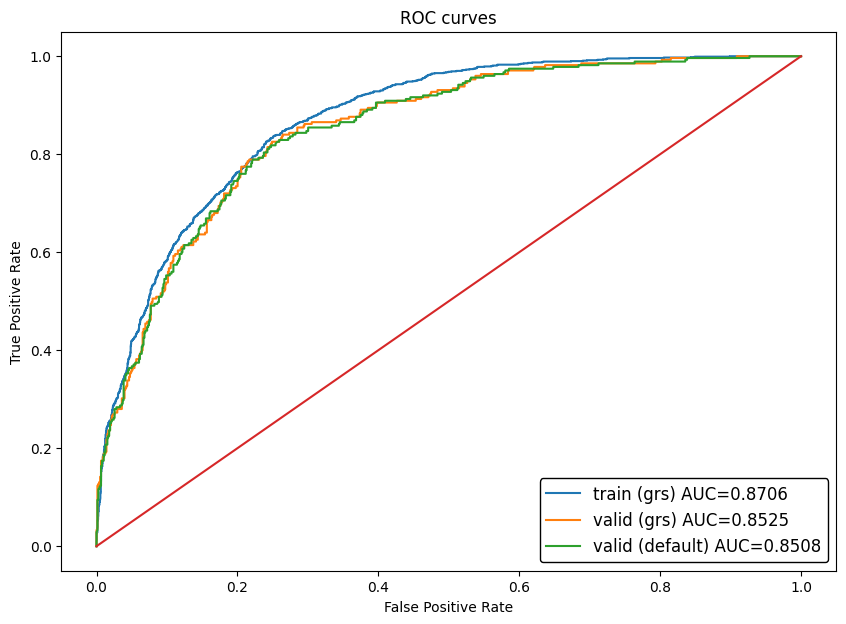

In [82]:
y_train_grs_pred = model_grid_search.predict_proba(X_train_upsampled)[:, 1]
y_valid_grs_pred = model_grid_search.predict_proba(X_valid)[:, 1]

train_grs_auc = roc_auc_score(y_train_upsampled, y_train_grs_pred)
valid_grs_auc = roc_auc_score(y_valid, y_valid_grs_pred)

plt.figure(figsize=(10,7))

plt.plot(*roc_curve(y_train_upsampled, y_train_grs_pred)[:2], label=f'train (grs) AUC={train_grs_auc:.4f}')
plt.plot(*roc_curve(y_valid, y_valid_grs_pred)[:2], label=f'valid (grs) AUC={valid_grs_auc:.4f}')
plt.plot(*roc_curve(y_valid, y_valid_def_pred)[:2], label=f'valid (default) AUC={valid_def_auc:.4f}')

plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))

legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")

plt.title('ROC curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


In [61]:
full_upsampled_pool = Pool(data = X_train_ups, label = y_train_ups, cat_features = cat_cols)
#model_grid_search.fit(full_upsampled_pool)

In [88]:
y_pred_boost_up = model_grid_search.predict_proba(test_data)[:, 1]
submission['Churn'] = y_pred_boost_up
submission.to_csv('datasets/churn/boost_up.csv', index = False)

In [65]:
model_grid_search2.fit(full_upsampled_pool)
y_pred_boost_up2 = model_grid_search2.predict_proba(test_data)[:, 1]
submission['Churn'] = y_pred_boost_up2
submission.to_csv('datasets/churn/boost_up2.csv', index = False)

0:	total: 19.7ms	remaining: 4.7s
239:	total: 5.2s	remaining: 0us


# Стекинг опять

In [108]:
from sklearn.ensemble import StackingClassifier
meta_model = LogisticRegression(C = 100)
stacking = StackingClassifier(estimators = [
    ('logreg', best_log_up),
    #('SVC', best_svc_up),
    ('tree', best_tree_up),
    ('forest', best_forest_up),
    ('catboost', model_grid_search2)],           
                    final_estimator = meta_model,
                             n_jobs = -1)
stacking.fit(X_train_up_prep, y_train_ups)
                              
                        

                             


StackingClassifier(estimators=[('logreg',
                                LogisticRegression(C=17.3, max_iter=5000,
                                                   random_state=22)),
                               ('tree',
                                DecisionTreeClassifier(max_depth=9,
                                                       min_samples_leaf=2,
                                                       min_samples_split=7,
                                                       random_state=22)),
                               ('forest',
                                RandomForestClassifier(max_depth=8,
                                                       min_samples_leaf=2,
                                                       n_estimators=80)),
                               ('catboost',
                                <catboost.core.CatBoostClassifier object at 0x000002EF8F382DD0>)],
                   final_estimator=LogisticRegression(C=100), n_jobs=-1)

In [109]:
y_pred_norm_stack = stacking.predict_proba(X_test)[:, 1]
submission['Churn'] = y_pred_norm_stack
submission.to_csv('datasets/churn/norm_stacking.csv', index = False)

## А теперь нормальный стекинг

In [95]:
from sklearn.ensemble import StackingClassifier
meta_model = catboost.CatBoostClassifier(
    logging_level = 'Silent',
    eval_metric="AUC:hints=skip_train~false",
    metric_period=1000,
    random_seed=0,
    grow_policy="Depthwise",
    l2_leaf_reg=1,
    learning_rate=0.08,
    max_depth=10,
    min_data_in_leaf=10,
    n_estimators=10,
    random_strength=11,
    subsample=0.1,
)
stacking = StackingClassifier(
    estimators = [
        ('logreg', best_log_clean),
        ('svc', best_svc),
        ('forest', best_forest_clean),
        ('catboost', catboost.CatBoostClassifier(n_estimators = 200)),
    ],
    final_estimator = meta_model,
    n_jobs = -1
)
stacking.fit(X_train_clean, y)

StackingClassifier(estimators=[('logreg',
                                LogisticRegression(C=7.9220534087609,
                                                   max_iter=5000,
                                                   random_state=22)),
                               ('svc',
                                SVC(C=0.001, degree=2, kernel='poly',
                                    probability=True)),
                               ('forest',
                                RandomForestClassifier(max_depth=7,
                                                       min_samples_leaf=5,
                                                       n_estimators=110,
                                                       random_state=22)),
                               ('catboost',
                                <catboost.core.CatBoostClassifier object at 0x000001F4D9BE1270>)],
                   final_estimator=<catboost.core.CatBoostClassifier object at 0x000001F4D9BE2D40>,
                   n_jobs=-1)

In [96]:
y_pred_norm_stack = stacking.predict_proba(X_test_clean)[:, 1]
submission['Churn'] = y_pred_norm_stack
submission.to_csv('datasets/churn/norm_stacking.csv', index = False) #Результат - 0.84835

### Лучший результат показа логистическая регрессия с C = 100 на наборе данных без добавления новых признаков. Лучший результат - 0.72607